In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) 
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- feature는 Pclass, Age, SibSp, Parch, Fare이고, 예측하려는 target label은 Survived

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
for col in df_train.columns:
    msg = 'column: {:>10}/t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId/t Percent of NaN value: 0.00%
column:   Survived/t Percent of NaN value: 0.00%
column:     Pclass/t Percent of NaN value: 0.00%
column:       Name/t Percent of NaN value: 0.00%
column:        Sex/t Percent of NaN value: 0.00%
column:        Age/t Percent of NaN value: 19.87%
column:      SibSp/t Percent of NaN value: 0.00%
column:      Parch/t Percent of NaN value: 0.00%
column:     Ticket/t Percent of NaN value: 0.00%
column:       Fare/t Percent of NaN value: 0.00%
column:      Cabin/t Percent of NaN value: 77.10%
column:   Embarked/t Percent of NaN value: 0.22%


In [20]:
for col in df_test.columns:
    msg = 'column: {:>10}/t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId/t Percent of NaN value: 0.00%
column:     Pclass/t Percent of NaN value: 0.00%
column:       Name/t Percent of NaN value: 0.00%
column:        Sex/t Percent of NaN value: 0.00%
column:        Age/t Percent of NaN value: 20.57%
column:      SibSp/t Percent of NaN value: 0.00%
column:      Parch/t Percent of NaN value: 0.00%
column:     Ticket/t Percent of NaN value: 0.00%
column:       Fare/t Percent of NaN value: 0.24%
column:      Cabin/t Percent of NaN value: 78.23%
column:   Embarked/t Percent of NaN value: 0.00%


<AxesSubplot:>

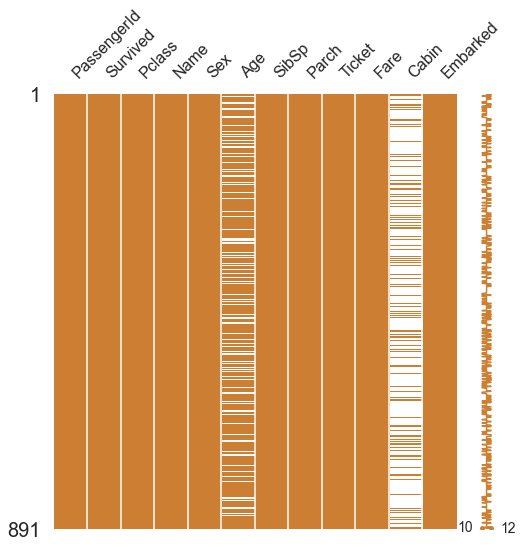

In [21]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color = (0.8, 0.5, 0.2))

<AxesSubplot:>

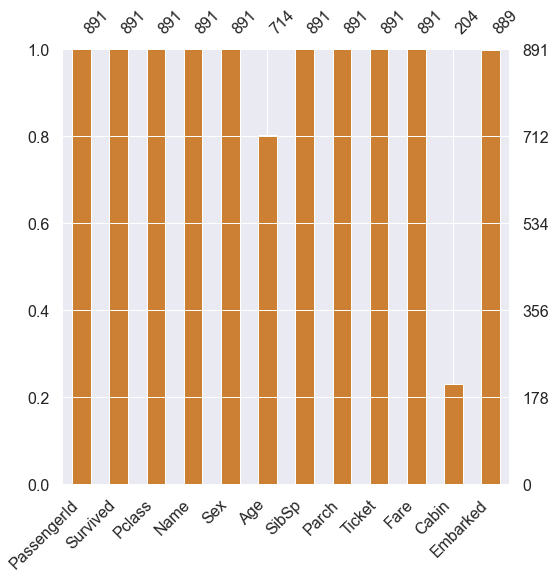

In [22]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

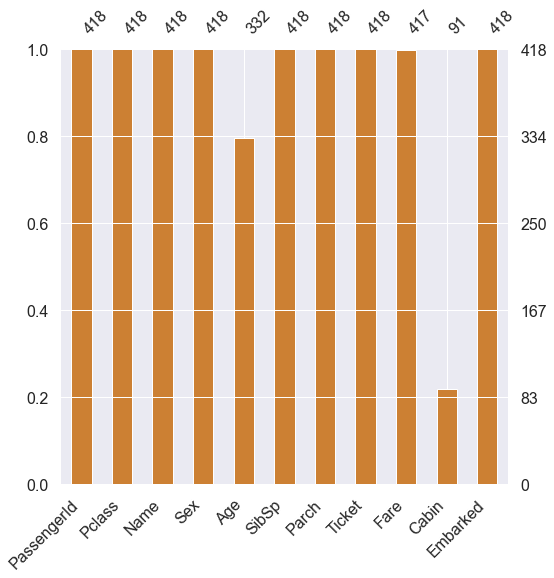

In [24]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

## Target label 확인
- target label이 어떤 distirbution을 가지고 있는지 확인해 봐야한다.
- binary classfication 문제의 경우에서, 1과 0의 분포가 어떠하냐에 따라 모델의 평가방법이 달라진다.

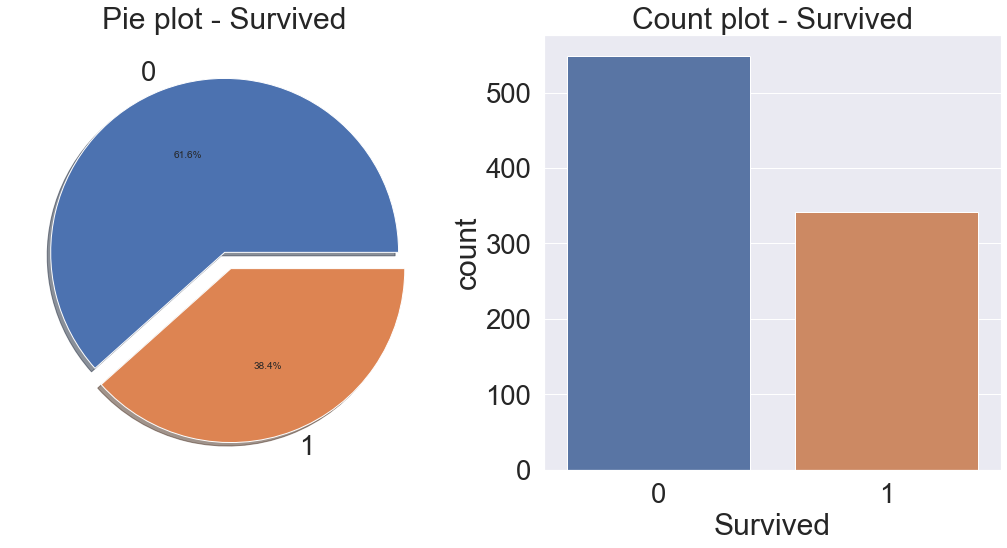

In [34]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                            autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

## Exploratory data analysis(EDA)
### 1. Pclass

In [35]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [36]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [40]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- grouped 객체에 mean()을 하게 되면, 각 클래스별 생존률을 얻을 수 있다.
- ex) class 1이면
# $\frac{80}{80 + 136} \approx 0.63$

<AxesSubplot:xlabel='Pclass'>

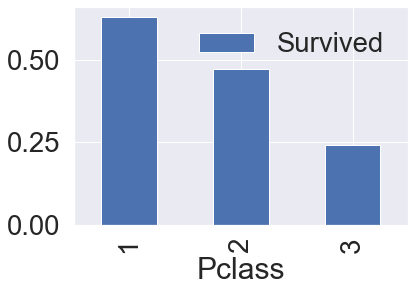

In [41]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by = 'Survived', ascending=False).plot.bar()

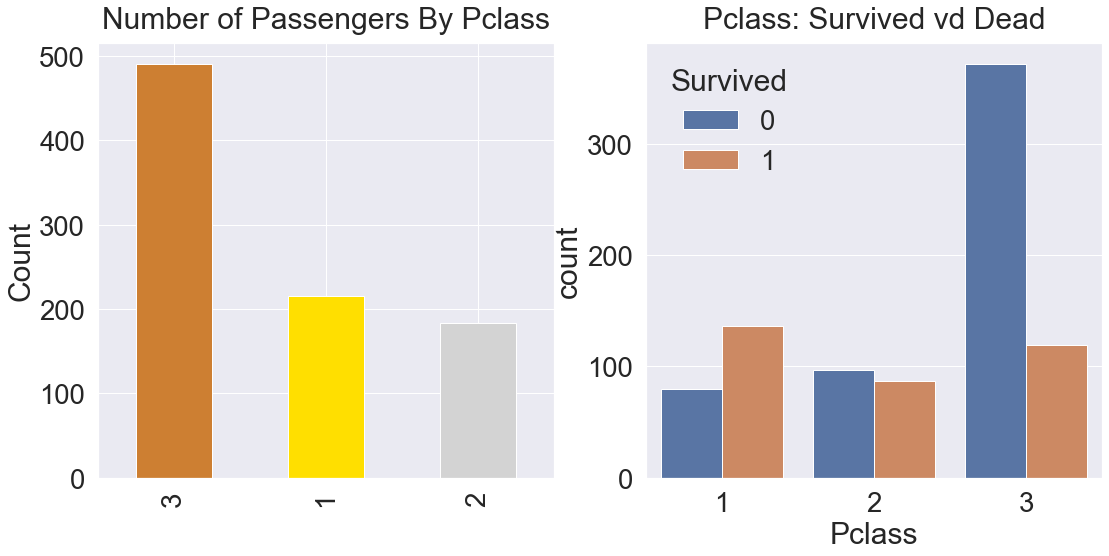

In [44]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vd Dead', y=y_position)
plt.show()

### 2. Sex
- 성별로 생존률이 어떻게 달라지는 지 확인
- pandas groupby와 seaborn countplot을 사용해서 시각화

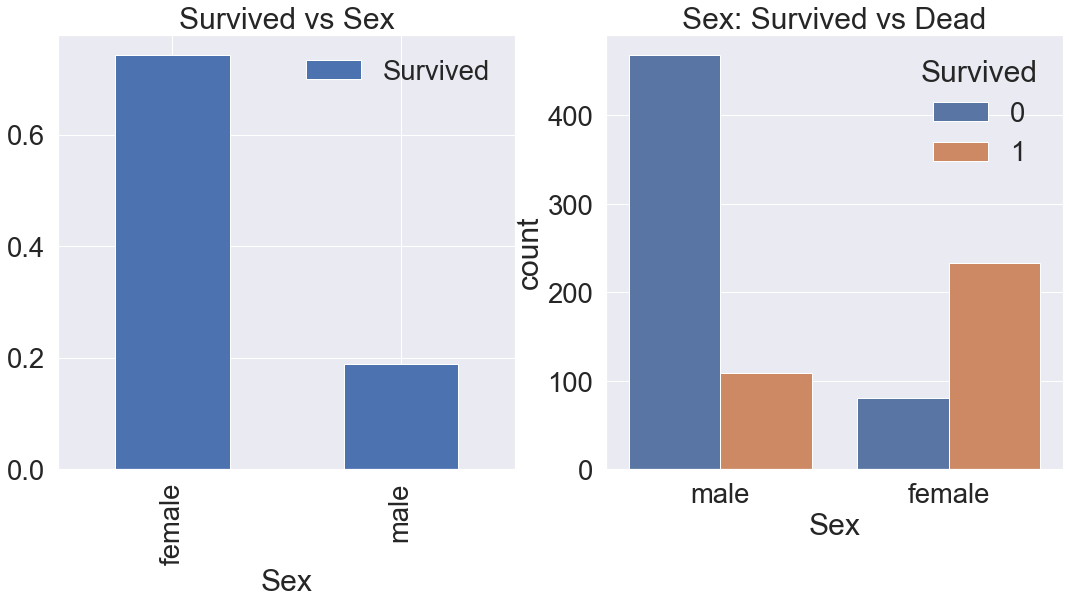

In [51]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [52]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [53]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 3. Both Sex and Pclass
- Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는지 확인
- seaborn의 factorplot을 이용하면, 쉽게 3차원으로 이루어진 그래프를 그릴 수 있음.

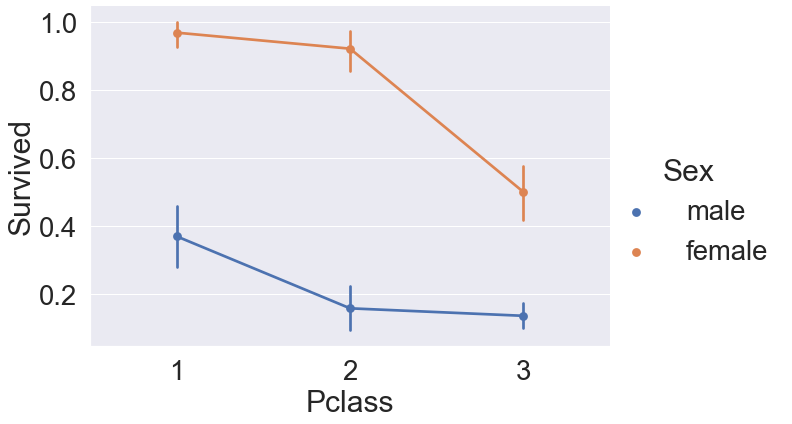

In [54]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

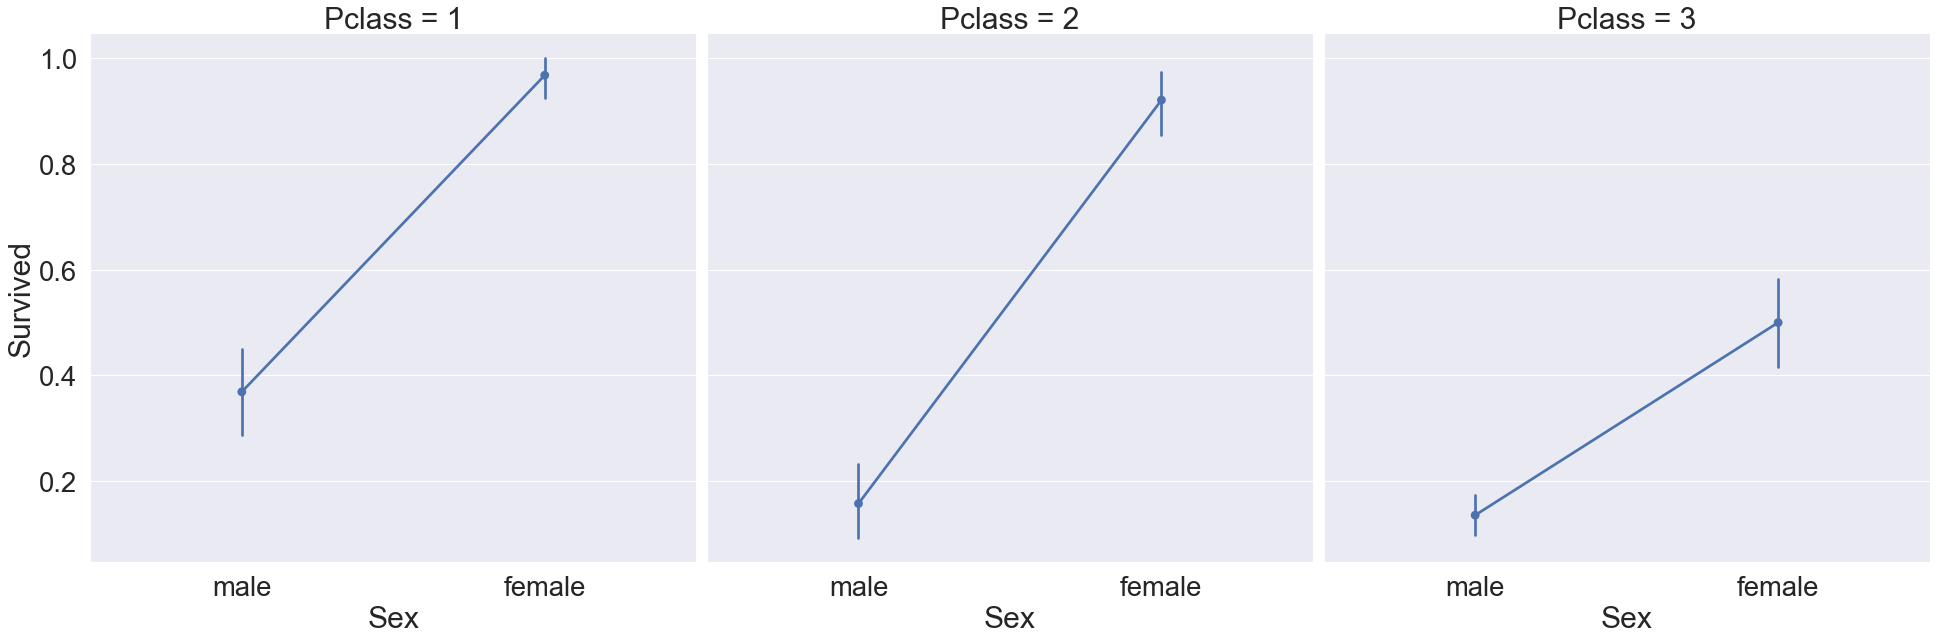

In [56]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)

### 4. Age

In [60]:
print('제일 나이 많은 탑승객 : {:.1f} 세'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} 세'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} 세'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 세
제일 어린 탑승객 : 0.4 세
탑승객 평균 나이 : 29.7 세


- 생존에 따른 Age의 histogram
- Kernel Density Estimatio(KDE) 커널 밀도 추정

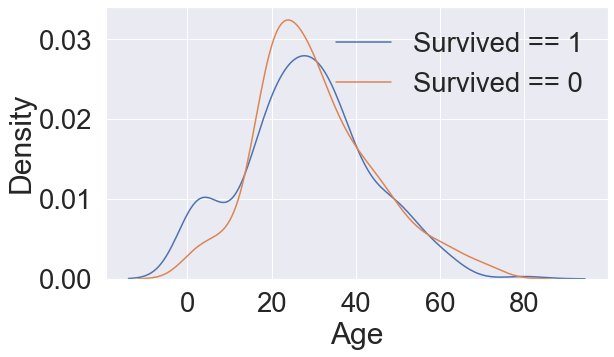

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

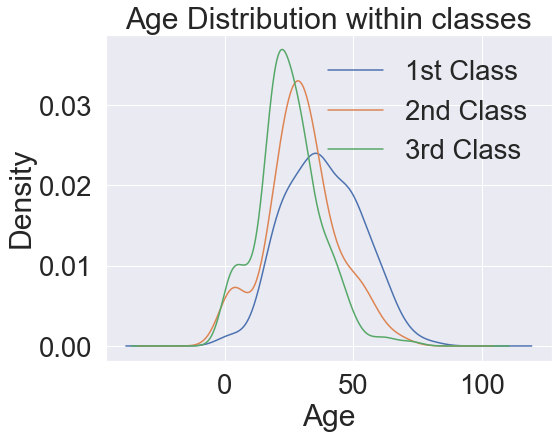

In [69]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

- class가 높을 수록 나이 많은 사람의 비중이 커진다
- 나이대를 변화시키면서 생존률 확인

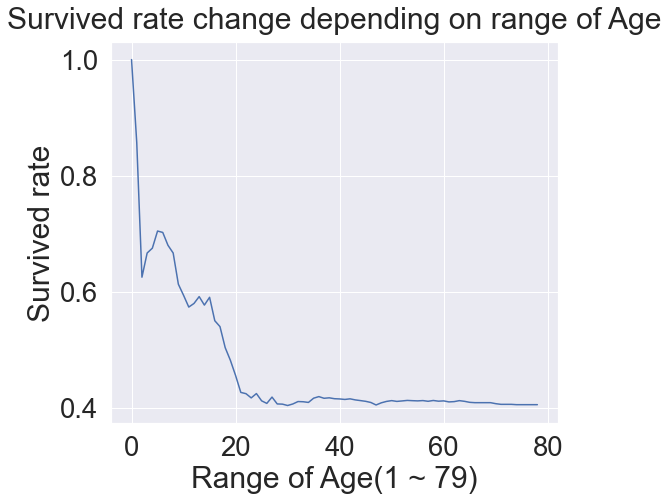

In [83]:
cummulate_survived_ratio = []
for i in range(1, 80):
    cummulate_survived_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(8, 7))
plt.plot(cummulate_survived_ratio)
plt.title('Survived rate change depending on range of Age', y=1.02)
plt.ylabel('Survived rate')
plt.xlabel('Range of Age(1 ~ 79)')
plt.show()

### 5. Pclass, Sex, Age
- 지금 까지 본 Sex, Pclass, Age, Survived 처럼 다수의 컬럼을 쉽게 그려주는 것이
  seborn의 violinplot
- x축은 우리가 나눠서 보고 싶어 하는 case(Pclass, Sex)를 나타내고 y축은 distribution(Age)이다.

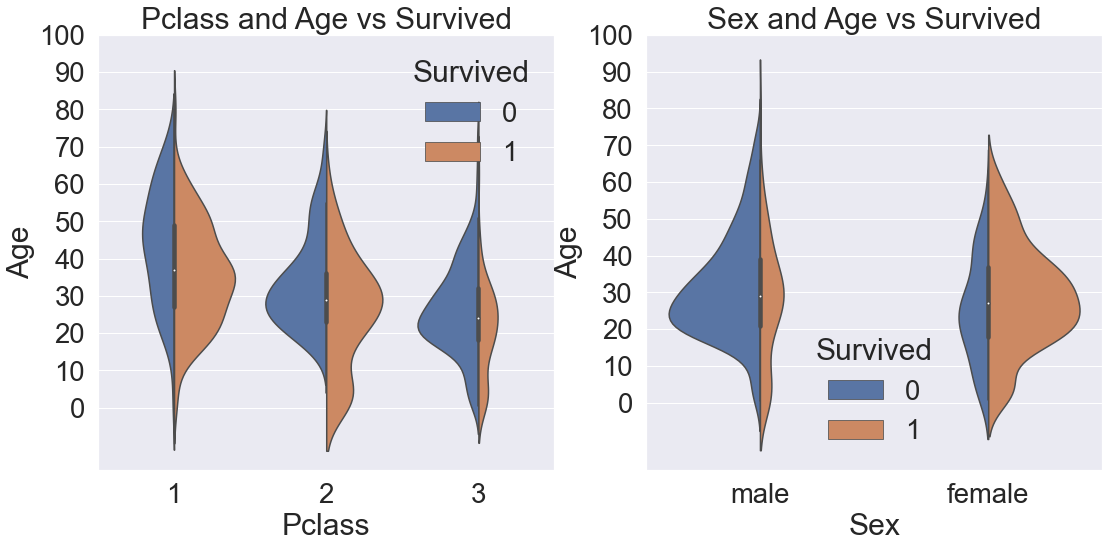

In [90]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()